In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [4]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [8]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.0746 - accuracy: 0.3444 - val_loss: 1.0916 - val_accuracy: 0.2333 - 799ms/epoch - 266ms/step
Epoch 2/200
3/3 - 0s - loss: 1.0154 - accuracy: 0.3444 - val_loss: 1.0207 - val_accuracy: 0.5333 - 29ms/epoch - 10ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9432 - accuracy: 0.6889 - val_loss: 0.9328 - val_accuracy: 0.5333 - 34ms/epoch - 11ms/step
Epoch 4/200
3/3 - 0s - loss: 0.8539 - accuracy: 0.7111 - val_loss: 0.8643 - val_accuracy: 0.5333 - 41ms/epoch - 14ms/step
Epoch 5/200
3/3 - 0s - loss: 0.7497 - accuracy: 0.7111 - val_loss: 0.7693 - val_accuracy: 0.5333 - 38ms/epoch - 13ms/step
Epoch 6/200
3/3 - 0s - loss: 0.6391 - accuracy: 0.7111 - val_loss: 0.6560 - val_accuracy: 0.5333 - 36ms/epoch - 12ms/step
Epoch 7/200
3/3 - 0s - loss: 0.5203 - accuracy: 0.7111 - val_loss: 0.5525 - val_accuracy: 0.5667 - 42ms/epoch - 14ms/step
Epoch 8/200
3/3 - 0s - loss: 0.4369 - accuracy: 0.7222 - val_loss: 0.4734 - val_accuracy: 0.8000 - 39ms/epoch - 13ms/step
Epoch 9/200
3/3 - 0s -

Epoch 68/200
3/3 - 0s - loss: 0.1869 - accuracy: 0.9222 - val_loss: 0.2387 - val_accuracy: 0.9333 - 43ms/epoch - 14ms/step
Epoch 69/200
3/3 - 0s - loss: 0.0417 - accuracy: 0.9667 - val_loss: 0.2924 - val_accuracy: 0.8667 - 43ms/epoch - 14ms/step
Epoch 70/200
3/3 - 0s - loss: 0.1162 - accuracy: 0.9556 - val_loss: 0.2217 - val_accuracy: 0.9333 - 43ms/epoch - 14ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0443 - accuracy: 0.9778 - val_loss: 0.2459 - val_accuracy: 0.9333 - 37ms/epoch - 12ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0476 - accuracy: 0.9889 - val_loss: 0.1943 - val_accuracy: 0.8667 - 42ms/epoch - 14ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0462 - accuracy: 0.9778 - val_loss: 0.2175 - val_accuracy: 0.9333 - 41ms/epoch - 14ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0689 - accuracy: 0.9667 - val_loss: 0.2303 - val_accuracy: 0.9333 - 42ms/epoch - 14ms/step
Epoch 75/200
3/3 - 0s - loss: 0.0661 - accuracy: 0.9556 - val_loss: 0.1906 - val_accuracy: 0.9000 - 42ms/epoch - 14ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.0405 - accuracy: 0.9889 - val_loss: 0.2451 - val_accuracy: 0.9333 - 47ms/epoch - 16ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0497 - accuracy: 0.9889 - val_loss: 0.1788 - val_accuracy: 0.9667 - 44ms/epoch - 15ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.1845 - val_accuracy: 0.9000 - 48ms/epoch - 16ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0584 - accuracy: 0.9444 - val_loss: 0.1981 - val_accuracy: 0.9333 - 41ms/epoch - 14ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.2219 - val_accuracy: 0.9333 - 43ms/epoch - 14ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.2060 - val_accuracy: 0.9333 - 42ms/epoch - 14ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.1828 - val_accuracy: 0.9667 - 40ms/epoch - 13ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0411 - accuracy: 0.9778 - val_loss: 0.1840 - val_accuracy: 0.9000 - 50ms/epoch - 17ms/step
Epoch 14

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

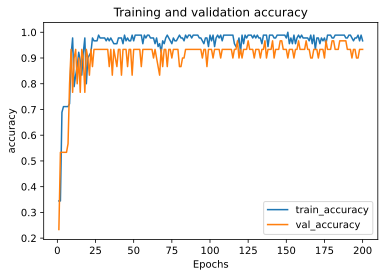

In [11]:
plot_metric(history, 'accuracy')

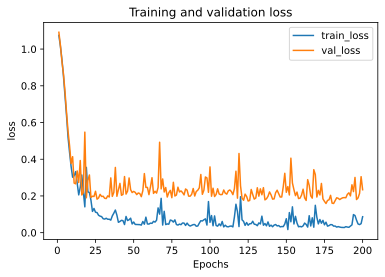

In [13]:
plot_metric(history, 'loss')

In [14]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0038 - accuracy: 1.0000 - 20ms/epoch - 20ms/step


[0.003816641867160797, 1.0]

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [23]:
def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [24]:
model = create_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                320       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [25]:
# First configure model using model.compile()
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.2091 - accuracy: 0.3556 - val_loss: 1.1131 - val_accuracy: 0.2000 - 800ms/epoch - 267ms/step
Epoch 2/200
3/3 - 0s - loss: 1.1487 - accuracy: 0.3556 - val_loss: 1.1068 - val_accuracy: 0.2333 - 24ms/epoch - 8ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1503 - accuracy: 0.2889 - val_loss: 1.1033 - val_accuracy: 0.2333 - 30ms/epoch - 10ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1221 - accuracy: 0.2889 - val_loss: 1.1022 - val_accuracy: 0.2333 - 34ms/epoch - 11ms/step
Epoch 5/200
3/3 - 0s - loss: 1.1413 - accuracy: 0.2667 - val_loss: 1.0994 - val_accuracy: 0.2333 - 32ms/epoch - 11ms/step
Epoch 6/200
3/3 - 0s - loss: 1.1219 - accuracy: 0.3222 - val_loss: 1.0971 - val_accuracy: 0.2333 - 24ms/epoch - 8ms/step
Epoch 7/200
3/3 - 0s - loss: 1.1095 - accuracy: 0.3222 - val_loss: 1.0985 - val_accuracy: 0.2333 - 22ms/epoch - 7ms/step
Epoch 8/200
3/3 - 0s - loss: 1.1016 - accuracy: 0.3667 - val_loss: 1.0990 - val_accuracy: 0.2333 - 41ms/epoch - 14ms/step
Epoch 9/200
3/3 - 0s - lo

Epoch 68/200
3/3 - 0s - loss: 0.4415 - accuracy: 0.7333 - val_loss: 0.5018 - val_accuracy: 0.5333 - 57ms/epoch - 19ms/step
Epoch 69/200
3/3 - 0s - loss: 0.4963 - accuracy: 0.7222 - val_loss: 0.4990 - val_accuracy: 0.5667 - 56ms/epoch - 19ms/step
Epoch 70/200
3/3 - 0s - loss: 0.4442 - accuracy: 0.7111 - val_loss: 0.4929 - val_accuracy: 0.5667 - 46ms/epoch - 15ms/step
Epoch 71/200
3/3 - 0s - loss: 0.4340 - accuracy: 0.7444 - val_loss: 0.4894 - val_accuracy: 0.6333 - 56ms/epoch - 19ms/step
Epoch 72/200
3/3 - 0s - loss: 0.4499 - accuracy: 0.7444 - val_loss: 0.4886 - val_accuracy: 0.6333 - 50ms/epoch - 17ms/step
Epoch 73/200
3/3 - 0s - loss: 0.4249 - accuracy: 0.7444 - val_loss: 0.4882 - val_accuracy: 0.6333 - 52ms/epoch - 17ms/step
Epoch 74/200
3/3 - 0s - loss: 0.4318 - accuracy: 0.7444 - val_loss: 0.4872 - val_accuracy: 0.6333 - 48ms/epoch - 16ms/step
Epoch 75/200
3/3 - 0s - loss: 0.4261 - accuracy: 0.7000 - val_loss: 0.4863 - val_accuracy: 0.6333 - 45ms/epoch - 15ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.2883 - accuracy: 0.9111 - val_loss: 0.3441 - val_accuracy: 0.9333 - 95ms/epoch - 32ms/step
Epoch 136/200
3/3 - 0s - loss: 0.2858 - accuracy: 0.9333 - val_loss: 0.3832 - val_accuracy: 0.8667 - 89ms/epoch - 30ms/step
Epoch 137/200
3/3 - 0s - loss: 0.3309 - accuracy: 0.8444 - val_loss: 0.3368 - val_accuracy: 0.9333 - 98ms/epoch - 33ms/step
Epoch 138/200
3/3 - 0s - loss: 0.2549 - accuracy: 0.9111 - val_loss: 0.3211 - val_accuracy: 0.9333 - 94ms/epoch - 31ms/step
Epoch 139/200
3/3 - 0s - loss: 0.2797 - accuracy: 0.8889 - val_loss: 0.3365 - val_accuracy: 0.9000 - 100ms/epoch - 33ms/step
Epoch 140/200
3/3 - 0s - loss: 0.2859 - accuracy: 0.9000 - val_loss: 0.3226 - val_accuracy: 0.9000 - 84ms/epoch - 28ms/step
Epoch 141/200
3/3 - 0s - loss: 0.2630 - accuracy: 0.9111 - val_loss: 0.2997 - val_accuracy: 0.9333 - 74ms/epoch - 25ms/step
Epoch 142/200
3/3 - 0s - loss: 0.2325 - accuracy: 0.9556 - val_loss: 0.3344 - val_accuracy: 0.9333 - 58ms/epoch - 19ms/step
Epoch 1

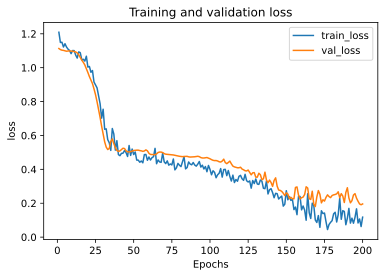

In [26]:
plot_metric(history, 'loss')

In [22]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0087 - accuracy: 1.0000 - 16ms/epoch - 16ms/step


[0.008742735721170902, 1.0]